In [1]:
from tensorflow.keras import layers,Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

2021-07-23 18:08:26.203843: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sahil/myfiles/auv/training/assing_1/work/devel/lib:/opt/ros/noetic/lib
2021-07-23 18:08:26.203877: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
(x_train,_),(x_test,_) = mnist.load_data()
x_train = (np.expand_dims(x_train,axis=3)).astype('float32')/255
x_test = (np.expand_dims(x_test,axis=3)).astype('float32')/255

noise = 0.3
np.random.seed(0)
x_train_noise = x_train + noise*np.random.normal(size=x_train.shape)
x_test_noise = x_test + noise*np.random.normal(size=x_test.shape)
x_train_noise = np.clip(x_train_noise,0.0,1.0)
x_test_noise = np.clip(x_test_noise,0.0,1.0)

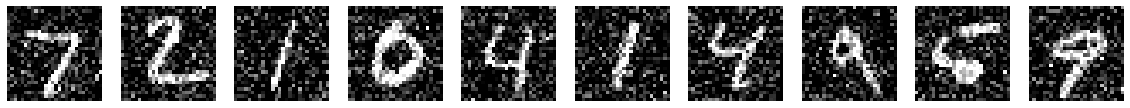

In [5]:
plt.figure(figsize=(20,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_test_noise[i],cmap = 'gray')
    plt.axis('off')
plt.show()

In [8]:
def build_autoencoder(input_shape=(28,28,1)):
    autoencoder = keras.models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(64,(3,3),padding='same',activation='relu'),
        layers.MaxPooling2D((2,2),padding='same'),
        layers.Conv2D(32,(3,3),padding='same',activation='relu'),
        layers.MaxPooling2D((2,2),padding='same'),

        layers.Conv2D(64,(3,3),padding='same',activation='relu'),
        layers.UpSampling2D((2,2)),
        layers.Conv2D(32,(3,3),padding='same',activation='relu'),
        layers.UpSampling2D((2,2)),

        layers.Conv2D(1,(3,3),padding='same',activation='sigmoid')
    ])
    return autoencoder

In [9]:
denoiser = build_autoencoder(x_train_noise[0].shape)
denoiser.compile(optimizer='adam',loss='binary_crossentropy')
denoiser.fit(x_train_noise,x_train,epochs=10,batch_size=256)

Epoch 1/10
235/235 [==============================] - 49s 209ms/step - loss: 0.1693
Epoch 2/10
235/235 [==============================] - 50s 212ms/step - loss: 0.0943
Epoch 3/10
235/235 [==============================] - 49s 209ms/step - loss: 0.0889
Epoch 4/10
235/235 [==============================] - 49s 207ms/step - loss: 0.0863
Epoch 5/10
235/235 [==============================] - 49s 208ms/step - loss: 0.0847
Epoch 6/10
235/235 [==============================] - 50s 212ms/step - loss: 0.0835
Epoch 7/10
235/235 [==============================] - 49s 207ms/step - loss: 0.0826
Epoch 8/10
235/235 [==============================] - 49s 207ms/step - loss: 0.0819
Epoch 9/10
235/235 [==============================] - 51s 215ms/step - loss: 0.0813
Epoch 10/10
235/235 [==============================] - 52s 219ms/step - loss: 0.0808


In [10]:
result = denoiser.evaluate(x_test_noise,x_test)
print(result)

313/313 [==============================] - 3s 9ms/step - loss: 0.0800
0.07995779812335968


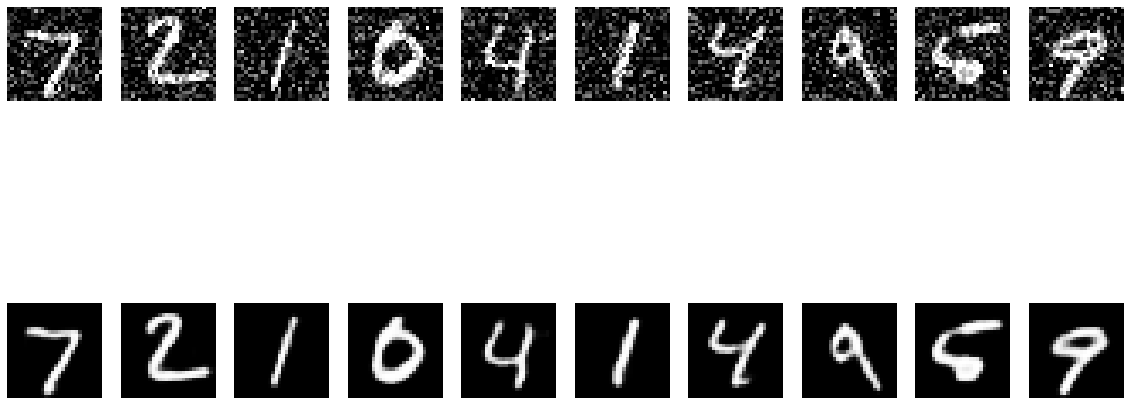

In [14]:
denoised_imgs = denoiser.predict(x_test_noise)
plt.figure(figsize=(20,10))
n = 10
for i in range(n):
    plt.subplot(2,n,i+1)
    plt.imshow(x_test_noise[i],cmap='gray')
    plt.axis('off')

    plt.subplot(2,n,i+1+n)
    plt.imshow(denoised_imgs[i],cmap='gray')
    plt.axis('off')
plt.show()